In [1]:
%matplotlib inline

01. Predict with pre-trained SSD models
==========================================

This article shows how to play with pre-trained SSD models with only a few
lines of code.

First let's import some necessary libraries:



In [2]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

Load a pretrained model
-------------------------

Let's get an SSD model trained with 512x512 images on Pascal VOC
dataset with ResNet-50 V1 as the base model. By specifying
``pretrained=True``, it will automatically download the model from the model
zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index`.



In [3]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

Pre-process an image
--------------------

Next we download an image, and pre-process with preset data transforms. Here we
specify that we resize the short edge of the image to 512 px. But you can
feed an arbitrarily sized image.

You can provide a list of image file names, such as ``[im_fname1, im_fname2,
...]`` to :py:func:`gluoncv.data.transforms.presets.ssd.load_test` if you
want to load multiple image together.

This function returns two results. The first is a NDArray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, the first dimension
of `x` is 1.



In [6]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/street_small.jpg?raw=true',
                          path='street_small.jpg')
im_fname = 'ppl.jpeg'
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 914)


Inference and display
---------------------

The forward function will return all detected bounding boxes, and the
corresponding predicted class IDs and confidence scores. Their shapes are
`(batch_size, num_bboxes, 1)`, `(batch_size, num_bboxes, 1)`, and
`(batch_size, num_bboxes, 4)`, respectively.

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:




[609.06506 360.75488 745.2766  436.80676]
<NDArray 4 @cpu(0)>

[0.84258765]
<NDArray 1 @cpu(0)>


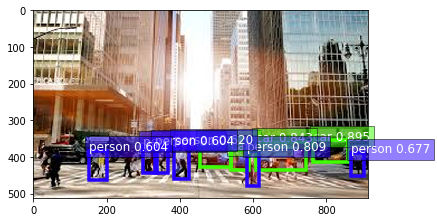

In [7]:
class_IDs, scores, bounding_boxes = net(x)
print(bounding_boxes[0][4])
print(scores[0][4])
ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()